In [53]:
#!pip install missingno

#### Exercise 2.01- Summarizing The statistics of Dataset

##### Read the earthquakes data into a data pandas DataFrame and use the dtyp dictionary we read using the json library in the previous section, to specify the data types of each column in the CSV. Begin by loading the requisite libraries and the JSON file we have prepared with the data types. You can inspect the data types before reading the data:

In [54]:
import json
import pandas as pd 
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
!ls

Activities- Chapter 2.ipynb
Bar Chart.ipynb
Exercise-2 (2.01-2.17) -earthquake data.ipynb
dtypes.json
earthquake_data-Copy1.csv
house_prices-Copy1.csv
joins Analytics.ipynb


##### Use the data.info() function to get an overview of the dataset

In [56]:
data = pd.read_csv('earthquake_data-Copy1.csv', dtype=dtype)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             6072 non-null   float64
 1   flag_tsunami                   6072 non-null   object 
 2   year                           6072 non-null   float64
 3   month                          5667 non-null   float64
 4   day                            5515 non-null   float64
 5   hour                           4044 non-null   float64
 6   minute                         3838 non-null   float64
 7   second                         2721 non-null   float64
 8   focal_depth                    3120 non-null   float64
 9   eq_primary                     4286 non-null   float64
 10  eq_mag_mw                      1216 non-null   float64
 11  eq_mag_ms                      2916 non-null   float64
 12  eq_mag_mb                      1786 non-null   f

##### Use data.describe() to find the summary statistics of the dataset. Run data.describe().T:

###### Here, .T indicates that we're taking a transpose of the DataFrame to which it is applied, that is, turning the columns into rows and vice versa. Applying it to the describe() function allows us to see the output more easily with each row in the transposed DataFrame now corresponding to the statistics for a single feature. 

In [58]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,6072.0,4658.426219,2924.650010,1.000,2142.75000,4608.5,6475.25000,10378.000
year,6072.0,1802.307477,377.924931,-2150.000,1818.00000,1927.0,1986.00000,2018.000
month,5667.0,6.510852,3.450167,1.000,4.00000,7.0,9.00000,12.000
day,5515.0,15.734361,8.752862,1.000,8.00000,16.0,23.00000,31.000
hour,4044.0,11.308605,7.033485,0.000,5.00000,11.0,17.00000,23.000
minute,3838.0,28.855915,17.151545,0.000,14.00000,30.0,44.00000,59.000
second,2721.0,29.740243,17.132196,0.100,14.80000,29.7,44.50000,59.900
focal_depth,3120.0,41.680769,71.258782,0.000,11.00000,26.0,40.00000,675.000
eq_primary,4286.0,6.471419,1.043968,1.600,5.70000,6.5,7.30000,9.500
eq_mag_mw,1216.0,6.526563,0.937869,3.600,5.80000,6.5,7.20000,9.500


##### Print the first five and the last five rows of the dataset. The first five rows are printed as follows:

In [59]:
data.head()

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
0,338.0,No,1048.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,771.0,Tsu,1580.0,4.0,6.0,NaN,NaN,NaN,33.0,6.2,...,1.309,120,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
2,7889.0,Tsu,1757.0,7.0,15.0,NaN,NaN,NaN,NaN,NaN,...,-6.320,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6697.0,Tsu,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6013.0,Tsu,1668.0,4.0,13.0,NaN,NaN,NaN,NaN,NaN,...,-71.050,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
data.tail()

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
6067,5360.0,Tsu,1993.0,8.0,8.0,8.0,34.0,24.9,59.0,7.8,...,144.801,170,48.0,1,250.0,4,48.0,1,250.0,4
6068,5009.0,No,1983.0,12.0,22.0,1.0,2.0,2.4,26.0,6.4,...,151.868,170,NaN,NaN,25.0,4,NaN,NaN,25.0,4
6069,10307.0,No,2018.0,2.0,25.0,17.0,44.0,43.0,23.0,7.5,...,142.768,170,300.0,3,61.0,4,300.0,3,61.0,4
6070,5498.0,No,1998.0,7.0,9.0,5.0,19.0,7.3,10.0,6.2,...,-28.626,130,100.0,2,72.0,4,100.0,2,72.0,4
6071,5459.0,No,1997.0,4.0,22.0,9.0,31.0,23.2,5.0,6.7,...,-60.892,90,2.0,1,25.0,4,2.0,1,25.0,4


##### We can also read in the metadata containing the data types for each column, which are stored in the form of a JSON file. Do this using the following command. This command opens the file in a readable format and uses the json library to read the file into a dictionary:

In [61]:
with open('dtypes.json') as jsonfile:
    dtype = json.load(jsonfile)
dtype

{'id': 'float',
 'flag_tsunami': 'str',
 'year': 'float',
 'month': 'float',
 'day': 'float',
 'hour': 'float',
 'minute': 'float',
 'second': 'float',
 'focal_depth': 'float',
 'eq_primary': 'float',
 'eq_mag_mw': 'float',
 'eq_mag_ms': 'float',
 'eq_mag_mb': 'float',
 'intensity': 'float',
 'country': 'str',
 'state': 'str',
 'location_name': 'str',
 'latitude': 'float',
 'longitude': 'float',
 'region_code': 'str',
 'injuries': 'float',
 'injuries_description': 'str',
 'damage_millions_dollars': 'float',
 'damage_description': 'str',
 'total_injuries': 'float',
 'total_injuries_description': 'str',
 'total_damage_millions_dollars': 'float',
 'total_damage_description': 'str'}

#### Exercise 2.02 - Visualizing missing values

##### Calculate the count and percentage of missing values in each column and arrange these in decreasing order. We will use the .isnull() function on the DataFrame to get a mask. The count of null values in each column can then be found using the .sum() function over the DataFrame mask. Similarly, the fraction of null values can be found using .mean() over the DataFrame mask and multiplied by 100 to convert it to a percentage.Then, we combine the total and percentage of null values into a single DataFrame using the pd.concat() function, and subsequently sort the rows by percentage of missing values and print the DataFrame:

In [62]:
mask = data.isnull()
total = mask.sum()
percent = 100*mask.mean()

In [63]:
mask.head()

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
0,False,False,False,True,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,True,True
1,False,False,False,False,False,True,True,True,False,False,...,False,False,True,True,True,False,True,True,True,True
2,False,False,False,False,False,True,True,True,True,True,...,False,False,True,True,True,True,True,True,True,True
3,False,False,False,True,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,True,True
4,False,False,False,False,False,True,True,True,True,True,...,False,False,True,True,True,True,True,True,True,True


In [64]:
percent

id                                0.000000
flag_tsunami                      0.000000
year                              0.000000
month                             6.669960
day                               9.173254
hour                             33.399209
minute                           36.791831
second                           55.187747
focal_depth                      48.616601
eq_primary                       29.413702
eq_mag_mw                        79.973650
eq_mag_ms                        51.976285
eq_mag_mb                        70.586298
intensity                        54.743083
country                           0.000000
state                            94.927536
location_name                     0.016469
latitude                          0.889328
longitude                         0.823452
region_code                       0.000000
injuries                         80.747694
injuries_description             77.783267
damage_millions_dollars          92.127800
damage_desc

In [65]:
missing_data = pd.concat([total,percent], 
                         axis=1, join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing',ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
state,5764,94.927536
total_damage_millions_dollars,5654,93.115942
damage_millions_dollars,5594,92.127800
injuries,4903,80.747694
total_injuries,4888,80.500659
eq_mag_mw,4856,79.973650
injuries_description,4723,77.783267
total_injuries_description,4715,77.651515
eq_mag_mb,4286,70.586298
second,3351,55.187747


##### Plot the nullity matrix. First, we find the list of columns that have any null values in them using the .any() function on the DataFrame mask from the previous step. Then, we use the missingno library to plot the nullity matrix for a random sample of 500 data points from our dataset, for only those columns that have missing values:

In [66]:
data.isnull().any()

id                               False
flag_tsunami                     False
year                             False
month                             True
day                               True
hour                              True
minute                            True
second                            True
focal_depth                       True
eq_primary                        True
eq_mag_mw                         True
eq_mag_ms                         True
eq_mag_mb                         True
intensity                         True
country                          False
state                             True
location_name                     True
latitude                          True
longitude                         True
region_code                      False
injuries                          True
injuries_description              True
damage_millions_dollars           True
damage_description                True
total_injuries                    True
total_injuries_descriptio

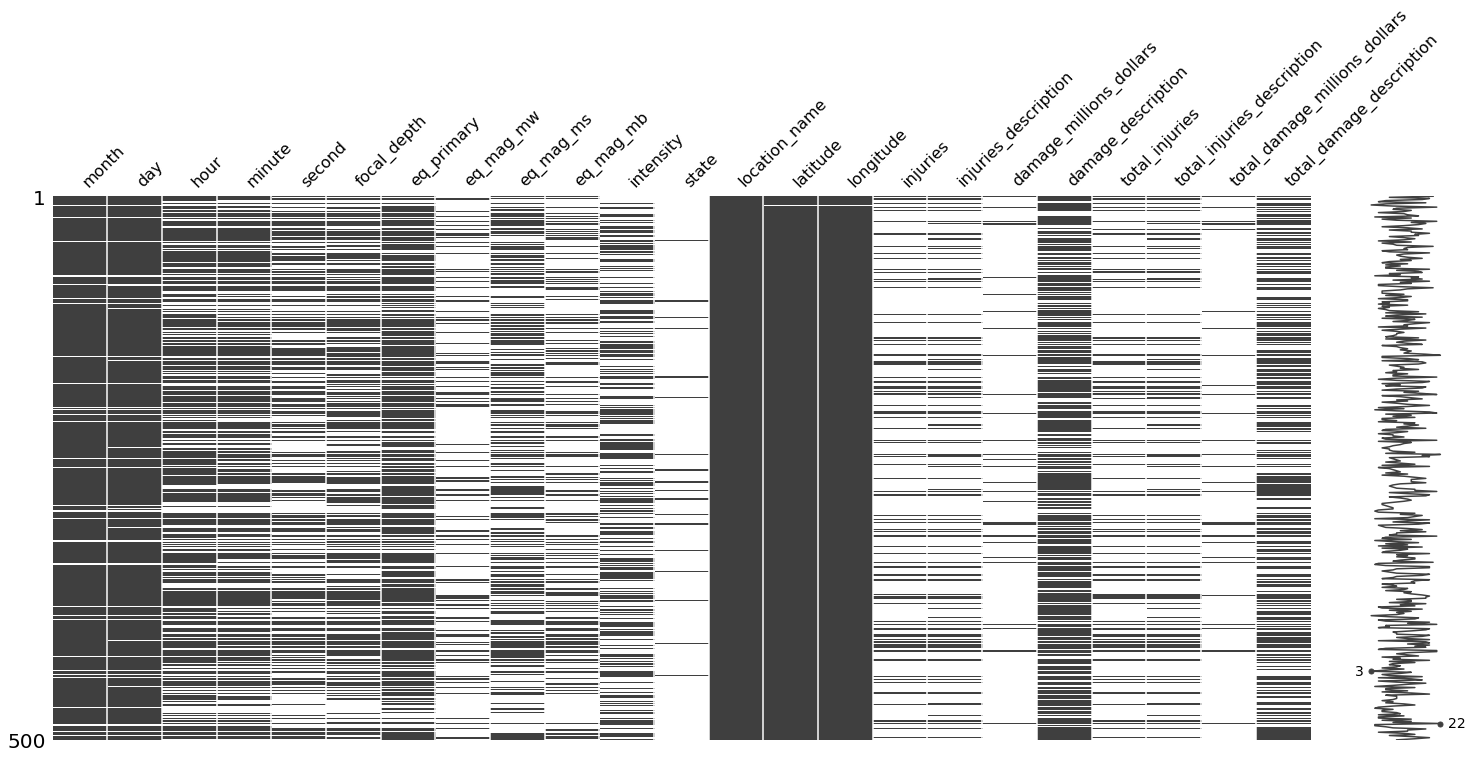

In [67]:
nullable_columns = data.columns[data.isnull().any()].tolist()
msno.matrix(data[nullable_columns].sample(500))

##### Plot the nullity correlation heatmap. We will plot the nullity correlation heatmap using the missingno library for our dataset, for only those columns that have missing values:

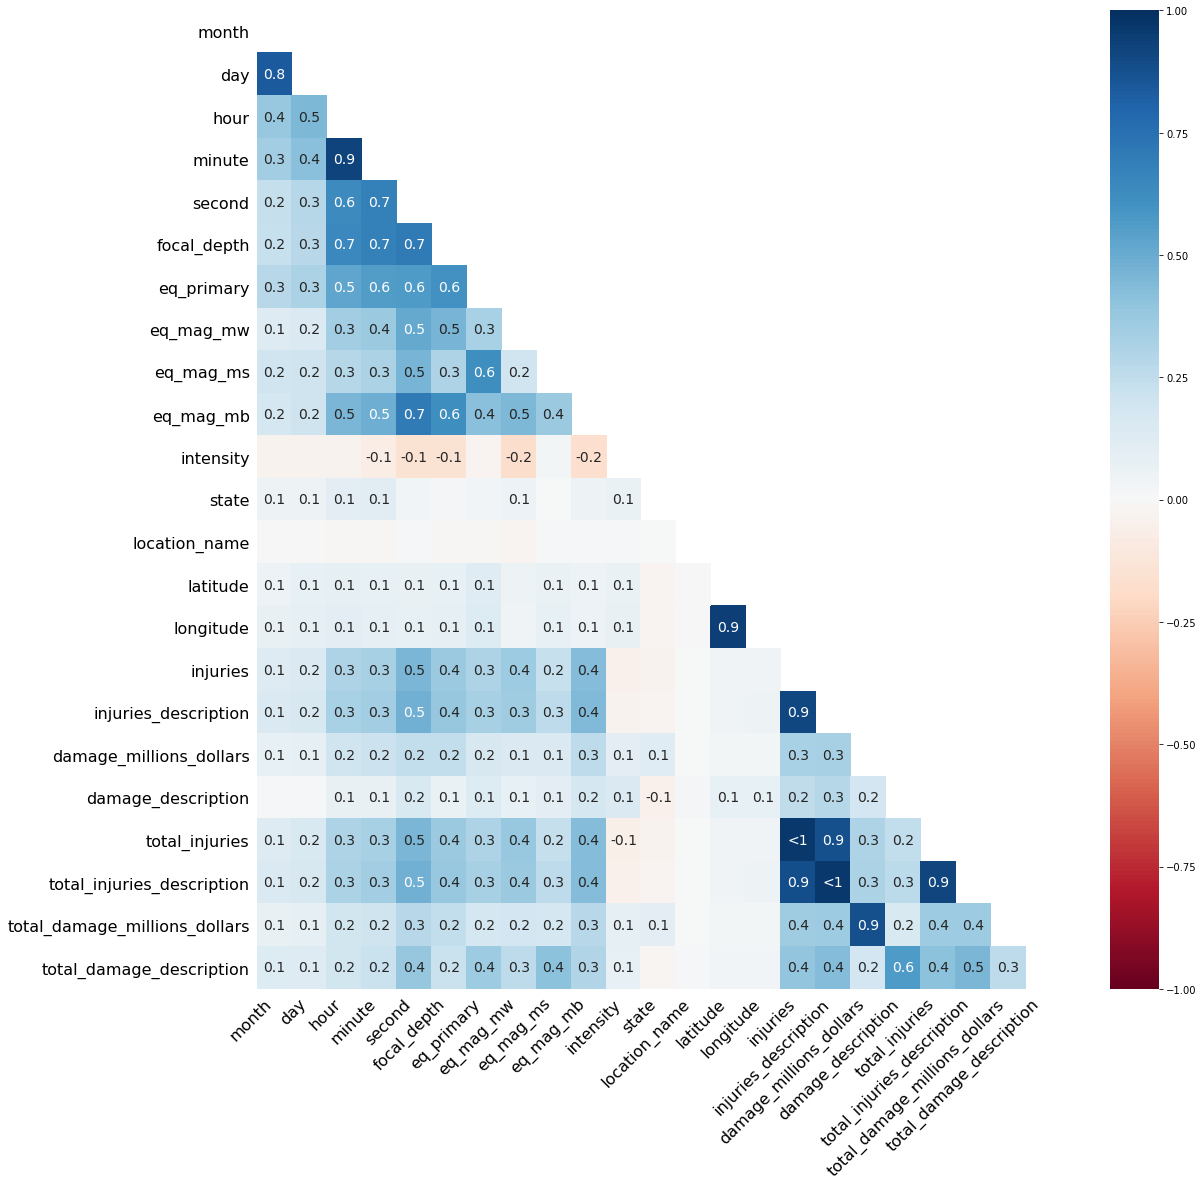

In [68]:
msno.heatmap(data[nullable_columns], figsize=(18,18))
plt.show()

#### Exercise-2.03 - Performing Imputation using pandas

##### Create a list containing the names of the columns whose values we want to impute:

In [69]:
time_features = ['month','day','hour','minute','second']


##### Impute the null values using .fillna(). We will replace the missing values in these columns with 0 using the inherent pandas .fillna() function and pass 0 as an argument to the function:

In [70]:
data[time_features]=data[time_features].fillna(0)

##### Use the .info() function to view null value counts for the imputed columns:

In [71]:
data[time_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   6072 non-null   float64
 1   day     6072 non-null   float64
 2   hour    6072 non-null   float64
 3   minute  6072 non-null   float64
 4   second  6072 non-null   float64
dtypes: float64(5)
memory usage: 237.3 KB


#### Exercise-2.04 - performing imputation using Scikit learn

##### Create a list containing the names of the columns whose values we want to impute:


In [72]:
description_features = [
    'injuries_description', 'damage_description',
    'total_injuries_description','total_damage_description'
]

#####  Create an object of the SimpleImputer class. Here, we first create an imp object of the SimpleImputer class and initialize it with parameters that represent how we want to impute the data. The parameters we will pass to initialize the object are as follows:
missing_values: This is the placeholder for the missing values, that is, all occurrences of the values in the missing_values parameter will be imputed.

strategy: This is the imputation strategy, which can be one of mean, median, most_frequent (that is, the mode), or constant. While the first three can only be used with numeric data and will replace missing values using the specified central value along each column, the last one will replace missing values with a constant as per the fill_value parameter.

fill_value: This specifies the value with which to replace all occurrences of missing_values. If left to the default, the imputed value will be 0 when imputing numerical data and the missing_value string for strings or object data types:

In [73]:
imp= SimpleImputer(missing_values=np.nan,strategy='constant',
                      fill_value='NA'
                      )

##### Perform the imputation. We will use imp.fit_transform() to actually perform the imputation. It takes the DataFrame with null values as input and returns the imputed DataFrame:

In [74]:
data[description_features] = imp.fit_transform(data[description_features])

##### Use the .info() function to view null value counts for the imputed columns:


In [75]:
data[description_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   injuries_description        6072 non-null   object
 1   damage_description          6072 non-null   object
 2   total_injuries_description  6072 non-null   object
 3   total_damage_description    6072 non-null   object
dtypes: object(4)
memory usage: 189.9+ KB


In [76]:
data['injuries_description'].unique()

array(['NA', '1', '2', '3', '4'], dtype=object)

#### Exercise 2.05 - Performing Imputation using inferred values

##### Find how many rows have null damage_millions_dollars values, and how many of those have non-null damage_description values:


In [77]:
print(data[pd.isnull(data.damage_millions_dollars)].shape[0])

5594


In [78]:
data[data.damage_millions_dollars.isnull()].shape[0]

5594

In [79]:
len(data[data.damage_millions_dollars.isnull()])

5594

In [80]:
print(data[pd.isnull(data.damage_millions_dollars) & (data.damage_description !='NA')].shape[0])

3849


##### Find the mean damage_millions_dollars value for each category. Since each of the categories in damage_description represents a range of values, we find the mean damage_millions_dollars value for each category from the non-null values already available. These provide a reasonable estimate for the most likely value for that category:

In [81]:
mean_per_category = data[['damage_description','damage_millions_dollars']].groupby('damage_description').mean()
mean_per_category

,damage_millions_dollars
damage_description,
1,0.417211
2,3.078840
3,13.818806
4,3574.998799
NA,NaN


##### Store the mean values as a dictionary. In this step, we will convert the DataFrame containing the mean values to a dictionary (a Python dict object), so that accessing them is convenient.
Additionally, since the value for the newly created NA category (the imputed value in the previous exercise) was NaN, and the value for the 0 category was absent (no rows had damage_description equal to 0 in the dataset), we explicitly added these values to the dictionary as well:

In [82]:
replacement_vals = mean_per_category.damage_millions_dollars.to_dict()
replacement_vals['NA']=-1
replacement_vals['0']=0
replacement_vals

{'1': 0.4172105263157895,
 '2': 3.0788402777777772,
 '3': 13.818805970149256,
 '4': 3574.9987991266385,
 'NA': -1,
 '0': 0}

##### Create a series of replacement values. For each value in the damage_description column, we map the categorical value onto the mean value using the map function. The .map() function is used to map the keys in the column to the corresponding values for each element from the replacement_values dictionary:

In [83]:
imputed_values = data.damage_description.map(replacement_vals)
imputed_values

0         -1.000000
1          3.078840
2         -1.000000
3         -1.000000
4         -1.000000
           ...     
6067    3574.998799
6068    3574.998799
6069    3574.998799
6070    3574.998799
6071    3574.998799
Name: damage_description, Length: 6072, dtype: float64

##### Replace null values in the column. We do this by using np.where as a ternary operator: the first argument is the mask, the second is the series from which to take the value if the mask is positive, and the third is the series from which to take the value if the mask is negative.
This ensures that the array returned by np.where only replaces the null values in damage_millions_dollars with values from the imputed_values series:

In [84]:
data['damage_millions_dollars']= np.where(
    data.damage_millions_dollars.isnull(), #mask
    data.damage_description.map(replacement_vals), #replacement vals
    data.damage_millions_dollars
)

##### Use the .info() function to view null value counts for the imputed columns:


In [85]:
data[['damage_millions_dollars']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   damage_millions_dollars  6072 non-null   float64
dtypes: float64(1)
memory usage: 47.6 KB


In [86]:
data[data.damage_millions_dollars.isnull()].shape[0]

0

In [87]:
data.damage_millions_dollars.head()

0   -1.00000
1    3.07884
2   -1.00000
3   -1.00000
4   -1.00000
Name: damage_millions_dollars, dtype: float64

#### Exercise- 2.06 

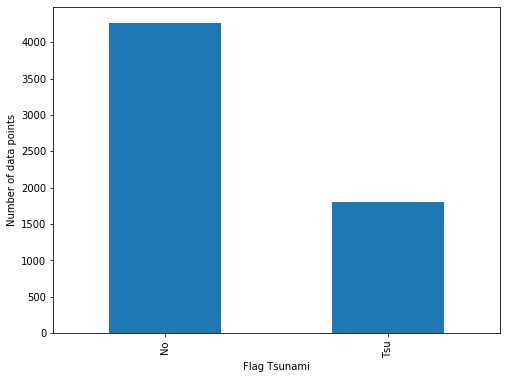

In [88]:
#Use plt.figure() to initiate the plotting:
plt.figure(figsize=(8,6))
#Next, type in our primary plotting command
data.flag_tsunami.value_counts().plot(kind='bar')
#Set the display parameters and display the plot
plt.xlabel('Flag Tsunami')
plt.ylabel('Number of data points')
plt.show()


#### Exercise-2.07

##### Find all the columns that are numerical and object types. We use the .select_dtypes() method on the DataFrame to create a subset DataFrame having numeric (np.number) and categorical (np.object) columns, and then print the column names for each. 

In [89]:
#for numeric values
numeric_variables = data.select_dtypes(include=[np.number])
numeric_variables.columns

Index(['id', 'year', 'month', 'day', 'hour', 'minute', 'second', 'focal_depth',
       'eq_primary', 'eq_mag_mw', 'eq_mag_ms', 'eq_mag_mb', 'intensity',
       'latitude', 'longitude', 'injuries', 'damage_millions_dollars',
       'total_injuries', 'total_damage_millions_dollars'],
      dtype='object')

In [90]:
#for object values

object_variable = data.select_dtypes(include=[np.object])
object_variable.columns

Index(['flag_tsunami', 'country', 'state', 'location_name', 'region_code',
       'injuries_description', 'damage_description',
       'total_injuries_description', 'total_damage_description'],
      dtype='object')

##### Find the number of unique values for numeric features. We use the select_dtypes method on the DataFrame to find the number of unique values in each column and sort the resulting series in ascending order. 

In [92]:
numeric_variables.nunique().sort_values()

intensity                          11
month                              13
hour                               24
day                                32
eq_mag_mb                          47
eq_mag_mw                          54
eq_mag_ms                          55
minute                             60
eq_primary                         64
focal_depth                       197
total_damage_millions_dollars     233
damage_millions_dollars           248
injuries                          338
total_injuries                    344
second                            576
year                              946
latitude                         2885
longitude                        3654
id                               6072
dtype: int64

In [93]:
object_variable.nunique().sort_values()

flag_tsunami                     2
injuries_description             5
damage_description               5
total_injuries_description       5
total_damage_description         5
region_code                     18
state                           29
country                        155
location_name                 3821
dtype: int64

#### Exercise-2.08

##### Use the value_counts() function on the injuries_description column to find the frequency of each category. Using value_counts gives us the frequencies of each value in decreasing order in the form of a pandas series:

In [94]:
counts = data.injuries_description.value_counts(dropna=False)
counts

NA    4723
1      666
3      347
2      193
4      143
Name: injuries_description, dtype: int64

##### Sort the values in increasing order of the ordinal variable. If we want the frequencies in the order of the values themselves, we can reset the index to give us a DataFrame and sort values by the index (that is, the ordinal variable):

In [95]:
counts.reset_index().sort_values(by='index') #sorting based on index

,index,injuries_description
1,1,666
3,2,193
2,3,347
4,4,143
0,NA,4723


In [96]:
counts.sort_values().reset_index() #sorting based on frequency

,index,injuries_description
0,4,143
1,2,193
2,3,347
3,1,666
4,NA,4723


#### Exercise-2.09

##### Format the data into the form that needs to be plotted. Here, we run value_counts() over the column and sort the series by index:

In [97]:
counts = data.damage_description.value_counts()
counts

NA    1745
2     1461
3     1309
1     1094
4      463
Name: damage_description, dtype: int64

In [98]:
counts.sort_index()

1     1094
2     1461
3     1309
4      463
NA    1745
Name: damage_description, dtype: int64

##### Plot the pie chart. The plt.pie() category plots the pie chart using the count data. We will use the same three steps for plotting as described in Exercise 2.06: Plotting a Bar Chart:              
1. Initiate the plot

2. use primary command for plotting          

3. set display parameter and then display the plot

### Redo + Re-understand??!! 

Patch: [<matplotlib.patches.Wedge object at 0x7f9f8da4a0d0>, <matplotlib.patches.Wedge object at 0x7f9f8da32410>, <matplotlib.patches.Wedge object at 0x7f9f8da4a4d0>, <matplotlib.patches.Wedge object at 0x7f9f8da4ab10>, <matplotlib.patches.Wedge object at 0x7f9f8da5e090>]


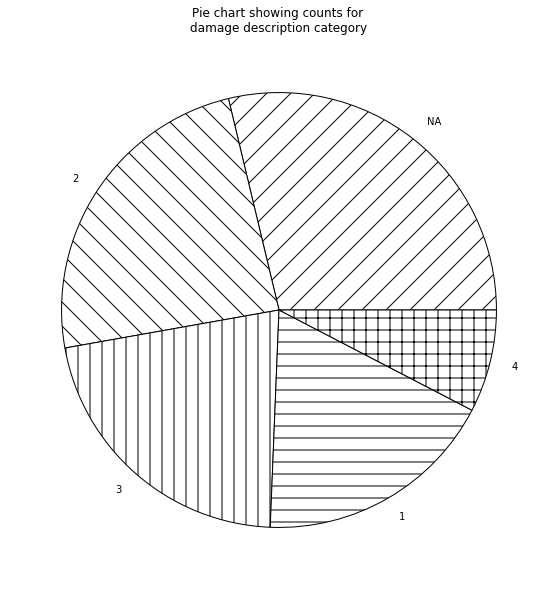

In [99]:
#1. Initiate the plot

fig,ax = plt.subplots(figsize=(10,10))

#2. use primary command for plotting 

slices= ax.pie(counts, 
                labels= counts.index,
                colors = ['white'],
                wedgeprops = {'edgecolor': 'black'}
               )


#3. set display parameter and then display the plot
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '\.', '*']
patches = slices[0]
print('Patch: {}'.format(patches))
for patch in range(len(patches)):
    patches[patch].set_hatch(hatches[patch])
plt.title('Pie chart showing counts for \ndamage description category')
plt.show()


## Continuous Data
For continuous variables, it is also very useful to see how the values are distributed in the range they operate in. Since we cannot simply find the counts of individual values, instead, we order the values in ascending order, group them into evenly-sized intervals, and find the counts for each interval. This gives us the underlying frequency distribution and plotting this gives us a histogram, which allows us to examine the shape, central values, and amount of variability in the data.

#### Exercise-2.10 - plotting a histogram

##### Use plt.figure() to initiate the plotting:


In [100]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

##### sns.distplot() is the primary command that we will use to plot the histogram. The first parameter is the one-dimensional data over which to plot the histogram, while the bins parameter defines the number and size of the bins. Use this as follows:


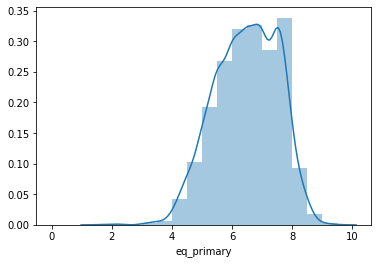

In [101]:
sns.distplot(data.eq_primary.dropna(), bins = np.linspace(0,10,21))

##### Display the plot using plt.show():


In [102]:
plt.show()

#### Exercise - 2.11 - Computing skew and curtosis

In [103]:
data.skew().sort_values()

year                             -3.859655
latitude                         -1.038393
region_code                      -0.539048
longitude                        -0.457442
intensity                        -0.442065
eq_primary                       -0.295823
eq_mag_ms                        -0.243581
eq_mag_mb                        -0.058037
month                            -0.012936
day                               0.036121
eq_mag_mw                         0.154842
id                                0.300563
hour                              0.570365
minute                            0.618738
second                            1.096737
focal_depth                       5.866408
total_damage_millions_dollars    13.227907
total_injuries                   22.191856
injuries                         24.428284
damage_millions_dollars          47.532464
dtype: float64

In [ ]:
data.kurt()

Here, we can see that the kurtosis values for some variables deviate significantly from 0. This means that these columns have a long tail. But the values that are at the tail end of these variables (which indicate the number of people dead, injured, and the monetary value of damage), in our case, may be outliers that we may need to pay special attention to. Larger values might, in fact, indicate an additional force that added to the devastation caused by an earthquake, that is, a tsunami.

## Relationships within Data

There are two reasons why it is important to find relationships between variables in the data:

Establishing which features are potentially important can be deemed essential, since finding ones that have a strong relationship with the target variable will aid in the feature selection process.
Finding relationships between different features themselves can be useful since variables in the dataset are usually never completely independent of every other variable and this can affect our modeling in a number of ways.
Now, there are a number of ways in which we can visualize these relationships, and this really depends on the types of variable we are trying to find the relationship between, and how many we are considering as part of the equation or comparison.

Relationship between Two Continuous Variables
Establishing a relationship between two continuous variables is basically seeing how one varies as the value of the other is increased. The most common way to visualize this would be to use a scatter plot, in which we take each variable along a single axis (the X and Y axes in a two-dimensional plane when we have two variables) and plot each data point using a marker in the X-Y plane. This visualization gives us a good idea of whether any kind of relationship exists between the two variables at all.

If we want to quantize the relationship between the two variables, however, the most common method is to find the correlation between them. If the target variable is continuous and it has a high degree of correlation with another variable, this is an indication that the feature would be an important part of the model.

Pearson's Coefficient of Correlation : 


Pearson's Coefficient of Correlation is a correlation coefficient that is commonly used to show the linear relationship between a pair of variables. The formula returns a value between -1 and +1, where:

+1 indicates a strong positive relationship
-1 indicates a strong negative relationship
0 indicates no relationship at all
It's also useful to find correlations between pairs of features themselves. In some models, highly correlated features can cause issues, including coefficients that vary strongly with small changes in data or modal parameters. In the extreme case, perfectly correlated features (such as X2 = 2.5 * X1) cause some models, including linear regression, to return undefined coefficients (values of Inf).

Note: When fitting a linear model, having features that are highly correlated to one another can result in an unpredictable and widely varying model. This is because the coefficients of each feature in a linear model can be interpreted as the unit change in the target variable, keeping all other features constant. When a set of features is not independent (that is, are correlated), however, we cannot determine the effect of the independent changes on the target variable due to each feature, resulting in widely varying coefficients.

To find the pairwise correlation for every numeric feature in a DataFrame with every other feature, we can use the .corr() function on the DataFrame.

#### Exercise - 2.12

Let's plot a scatter plot between the primary earthquake magnitude on the X axis and the corresponding number of injuries on the Y axis.Filter out the null values. Since we know that there are null values in both columns, let's first filter the data to include only the non-null rows:

In [108]:
data_for_plotting = data.loc[~pd.isnull(data.eq_primary) & ~pd.isnull(data.injuries)]

In [109]:
data_for_plotting

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
53,2564.0,Tsu,1899.0,12.0,25.0,12.0,25.0,0.0,NaN,6.4,...,-117.000,150,8.0,1,3.07884,2,NaN,NA,NaN,NA
92,3980.0,Tsu,1951.0,8.0,21.0,10.0,57.0,0.0,60.0,6.9,...,-156.000,150,2.0,1,3.07884,2,NaN,NA,NaN,NA
108,4813.0,No,1978.0,8.0,13.0,22.0,54.0,53.5,7.0,5.6,...,-119.700,150,65.0,2,15.00000,3,NaN,NA,NaN,NA
109,4847.0,No,1979.0,10.0,15.0,23.0,16.0,54.1,10.0,6.9,...,-115.324,150,91.0,2,30.00000,4,NaN,NA,NaN,NA
122,7614.0,No,2007.0,8.0,17.0,0.0,38.0,56.0,0.0,1.6,...,-111.207,150,6.0,1,-1.00000,NA,6.0,1,NaN,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6064,10277.0,No,2017.0,11.0,15.0,5.0,29.0,32.0,10.0,5.4,...,129.270,30,90.0,2,52.00000,4,90.0,2,52.0,4
6067,5360.0,Tsu,1993.0,8.0,8.0,8.0,34.0,24.9,59.0,7.8,...,144.801,170,48.0,1,250.00000,4,48.0,1,250.0,4
6069,10307.0,No,2018.0,2.0,25.0,17.0,44.0,43.0,23.0,7.5,...,142.768,170,300.0,3,61.00000,4,300.0,3,61.0,4
6070,5498.0,No,1998.0,7.0,9.0,5.0,19.0,7.3,10.0,6.2,...,-28.626,130,100.0,2,72.00000,4,100.0,2,72.0,4


Create and display the scatter plot. We will use Matplotlib's plt.scatter(x=..., y=...) command as the primary command for plotting the data. The x and y parameters state which feature is to be considered along which axis. They take a single-dimensional data structure such as a list, a tuple, or a pandas series. We can also send the scatter function more parameters that define, say, the icon to use to plot an individual data point. For example, to use a red cross as the icon, we would need to send the parameters marker='x', c='r':

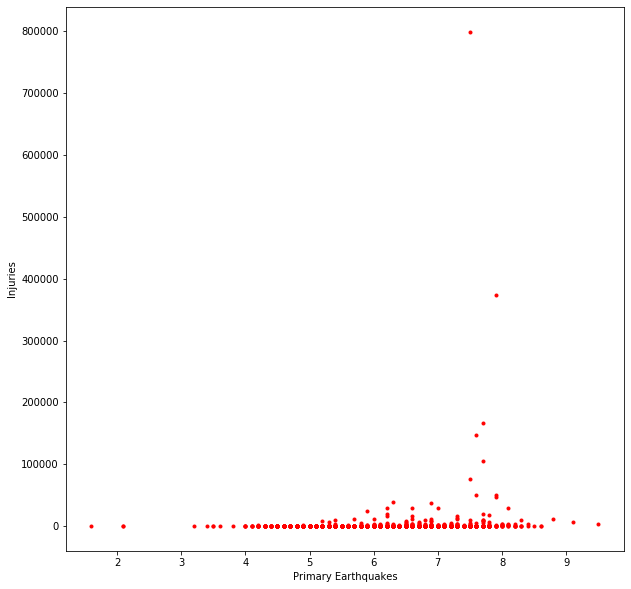

In [112]:
plt.figure(figsize=(10,10))

plt.scatter(x= data_for_plotting.eq_primary, y = data_for_plotting.injuries, marker='.',c='r' )

plt.xlabel('Primary Earthquakes')
plt.ylabel('Injuries')
plt.show()

#### Exercise 2.13: Plotting a Correlation Heatmap



Plot a basic heatmap with all the features:
The optional parameters passed to the sns.heatmap() function are square and cmap, which indicate that the plot should be such that each pixel is square and specify which color scheme to use, respectively:

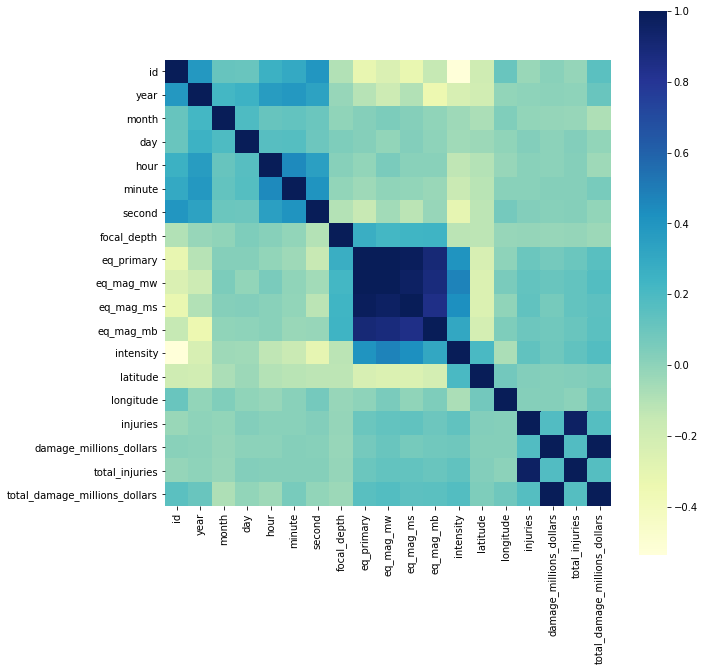

In [114]:
plt.figure(figsize = (10,10))

sns.heatmap(data.corr(), square= True, cmap = 'YlGnBu' )

plt.show()

Plot a subset of features in a more customized heatmap. We will specify the upper and lower limits using the vmin and vmax parameters and plot the heatmap again with annotations specifying the pairwise correlation values on a subset of features. We will also change the color scheme to one that can be better interpreted—while the neutral white will represent no correlation, increasingly darker shades of blue and red will represent higher positive and negative correlation values, respectively:

In [115]:
feature_subset = [
    'focal_depth', 'eq_primary', 'eq_mag_mw', 'eq_mag_ms', 'eq_mag_mb', 'intensity',
    'latitude', 'longitude', 'injuries', 'damage_millions_dollars',
    'total_injuries', 'total_damage_millions_dollars']

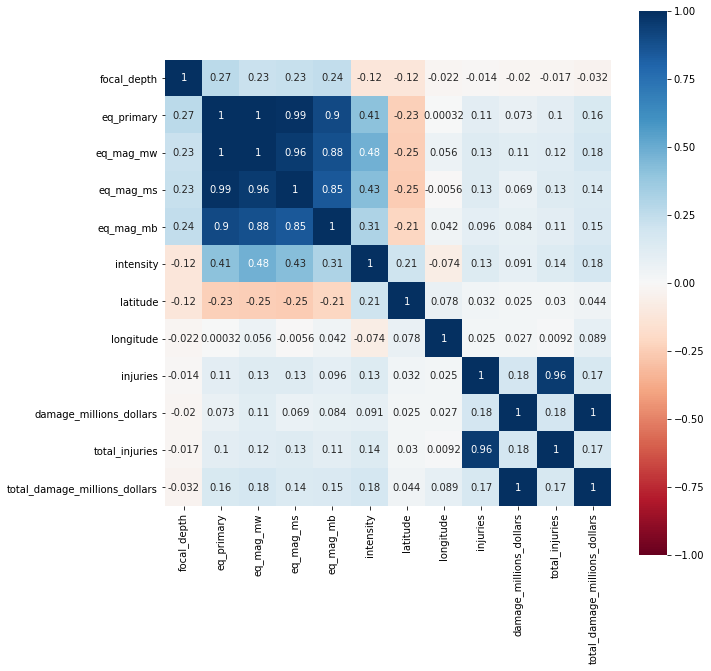

In [116]:
plt.figure(figsize=(10,10))

sns.heatmap(data[feature_subset].corr(), vmax=1, vmin=-1, cmap='RdBu', square=True, annot = True )

plt.show()

Now, while we can calculate the value of correlation, this only gives us an indication of a linear relationship. To better judge whether there's a possible dependency, we could plot a scatter plot between pairs of features, which is mostly useful when the relationship between the two variables is not known, and visualizing how the data points are scattered or distributed could give us an idea of whether (and how) the two may be related.

##### Using Pairplots


A pairplot is useful for visualizing multiple relationships between pairs of features at once and can be plotted using Seaborn's .pairplot() function. In Exercise 2.14, Implementing a Pairplot, we will create a pairplot and visualize relations between the features in a dataset.

Relationship between a Continuous and a Categorical Variable
A common way to view the relationship between two variables when one is categorical and the other is continuous is to use a bar plot or a box plot:

A bar plot helps compare the value of a variable for a discrete set of parameters and is one of the most common types of plots. Each bar represents a categorical value and the height of the bar usually represents an aggregated value of the continuous variable over that category (such as average, sum, or count of the values of the continuous variable in that category).
A box plot is a rectangle drawn to represent the distribution of the continuous variable for each discrete value of the categorical variable. It not only allows us to visualize outliers efficiently but also allows us to compare the distribution of the continuous variable across categories of the categorical variable. The lower and upper edges of the rectangle represent the first and third quartiles, respectively, the line down through the middle represents the median value, and the points (or fliers) above and below the rectangle represent outlier values.
Relationship Between Two Categorical Variables
When we are looking at only a pair of categorical variables to find a relationship between them, the most intuitive way to do this is to divide the data on the basis of the first category, and then subdivide it further on the basis of the second categorical variable and look at the resultant counts to find the distribution of data points. While this might seem confusing, a popular way to visualize this is to use stacked bar charts. As in a regular bar chart, each bar would represent a categorical value. But each bar would again be subdivided into color-coded categories that would provide an indication of what fraction of the data points in the primary category fall into each subcategory (that is, the second category). The variable with a larger number of categories is usually considered the primary category.




#### Exercise 2.14: Implementing a Pairplot



Define a list having the subset of features on which to create the pairplot:


In [117]:
feature_subset = [
    'focal_depth', 'eq_primary', 'eq_mag_mw', 'eq_mag_ms', 'eq_mag_mb', 'intensity',
]

Create the pairplot using seaborn. The arguments sent to the plotting function are kind='scatter', which indicates that we want each individual plot between the pair of variables in the grid to be represented as a scatter plot, and diag_kind='kde', which indicates that we want the plots along the diagonal (where both the features in the pair are the same) to be a kernel density estimate.
It should also be noted here that the plots symmetrically across the diagonal from one another will essentially be the same, just with the axes reversed:

<Figure size 720x720 with 0 Axes>

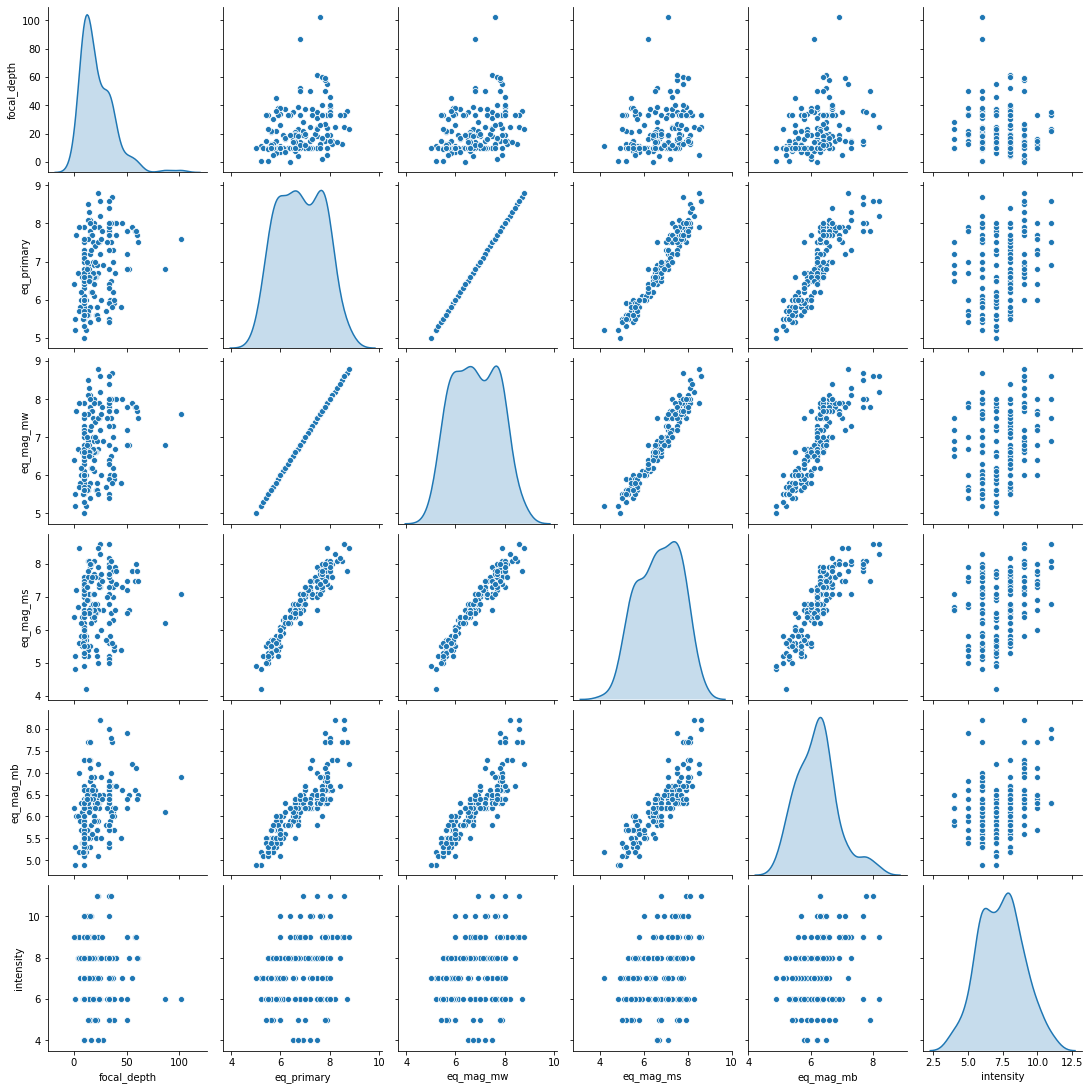

In [118]:
plt.figure(figsize=(10,10))

sns.pairplot(data[feature_subset].dropna(), diag_kind='kde', kind='scatter')

plt.show()

#### Exercise 2.15: Plotting a Bar Chart



Let's visualize the total number of tsunamis created by earthquakes of each intensity level using a bar chart.

1. Preprocess the flag_tsunami variable. Before we can use the flag_tsunami variable, we need to preprocess it to convert the No values to zeros and the Tsu values to ones. This will give us the binary target variable. To do this, we set the values in the column using the .loc operator, with : indicating that values need to be set for all rows, and the second parameter specifying the name of the column for which values are to be set:

In [119]:
data['flag_tsunami']= data.flag_tsunami.apply(lambda s : int(str(s)=='Tsu'))

In [123]:
data.flag_tsunami.value_counts()

0    4270
1    1802
Name: flag_tsunami, dtype: int64

2. Remove all rows having null intensity values from the data we want to plot:


In [130]:
subset = data[~pd.isnull(data.intensity)][['intensity','flag_tsunami']]
subset

,intensity,flag_tsunami
4,4.0,1
5,8.0,1
7,10.0,1
8,10.0,1
12,10.0,0
...,...,...
6065,10.0,0
6066,10.0,1
6067,9.0,1
6068,5.0,0


3. Find the total number of tsunamis for each intensity level and display the DataFrame. To get the data in a format by means of which a bar plot can be visualized, we will need to group the rows by each intensity level, and then sum over the flag_tsunami values to get the total number of tsunamis for each intensity level:

In [131]:
data_to_plot = subset.groupby('intensity').sum()
data_to_plot

,flag_tsunami
intensity,
2.0,0
3.0,8
4.0,19
5.0,38
6.0,63
7.0,91
8.0,119
9.0,132
10.0,130


4. Plot the bar chart, using Matplotlib's plt.bar(x=..., height=...) method, which takes two arguments, one specifying the x values at which bars need to be drawn, and the second specifying the height of each bar. Both of these are one-dimensional data structures that must have the same length:

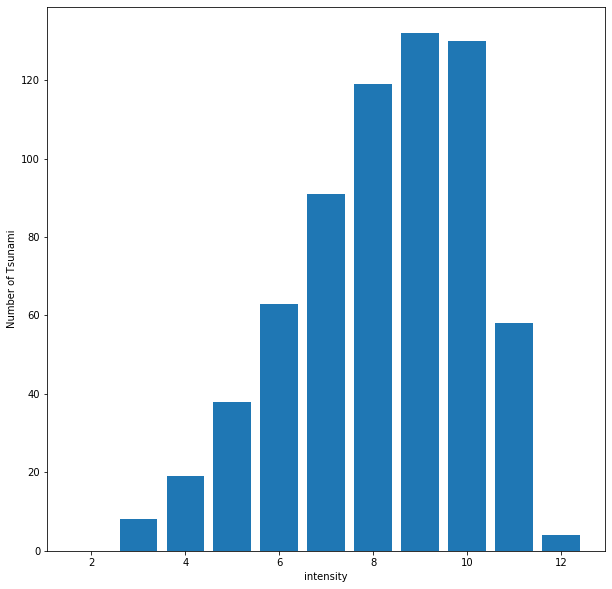

In [132]:
plt.figure(figsize=(10,10))

plt.bar(x= data_to_plot.index , height =data_to_plot.flag_tsunami )

plt.xlabel('intensity')
plt.ylabel('Number of Tsunami')

plt.show()

#### Exercise 2.16: Visualizing a Box Plot



In this exercise, we'll plot a box plot that represents the variation in eq_primary over those countries with at least 100 earthquakes. 

1. Find countries with over 100 earthquakes. We will find the value counts for all the countries in the dataset. Then, we'll create a series comprising only those countries having a count greater than 100:


In [144]:
country_counts = data.country.value_counts()
top_countries = country_counts[country_counts.values > 100]
top_countries

CHINA          590
JAPAN          403
INDONESIA      379
IRAN           377
ITALY          325
TURKEY         321
USA            260
GREECE         260
PHILIPPINES    210
MEXICO         198
CHILE          193
PERU           180
RUSSIA         149
Name: country, dtype: int64

In [141]:
print ( type(country_counts), 
        country_counts.index, 
        country_counts.values )

<class 'pandas.core.series.Series'> Index(['CHINA', 'JAPAN', 'INDONESIA', 'IRAN', 'ITALY', 'TURKEY', 'USA',
       'GREECE', 'PHILIPPINES', 'MEXICO',
       ...
       'LIBYA', 'LAOS', 'FRENCH GUIANA', 'CZECH REPUBLIC', 'MADAGASCAR',
       'ZAMBIA', 'MONTSERRAT', 'URUGUAY',
       'WALLIS AND FUTUNA (FRENCH TERRITORY)', 'ERITREA'],
      dtype='object', length=155) [590 403 379 377 325 321 260 260 210 198 193 180 149  95  94  91  77  66
  65  63  59  59  57  53  52  51  46  42  39  39  38  37  33  33  33  31
  25  25  24  23  23  23  23  23  22  22  20  20  20  19  19  19  18  18
  17  17  16  16  15  15  15  15  15  15  14  14  14  14  14  13  13  13
  13  12  12  11  10  10  10  10   9   9   9   9   8   8   8   7   6   6
   6   6   6   6   5   5   5   5   5   5   5   4   4   4   4   4   4   3
   3   3   3   3   3   3   2   2   2   2   2   2   2   2   2   2   2   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1]


2. Subset the DataFrame to filter in only those rows having countries in the preceding set. To filter the rows, we use the .isin() method on the pandas series to select those rows containing a value in the array-like object passed as a parameter:


In [147]:
subset = data[data.country.isin(top_countries.index)]


3. Create and display the box plot. The primary command for plotting the data is sns.boxplot(x=..., y=..., data=..., order=). The x and y parameters are the names of the columns in the DataFrame to be plotted on each axis—the former is assumed to be the categorical variable and the latter the continuous. The data parameter takes the DataFrame from which to take the data and order takes a list of category names that indicates the order in which to display the categories on the X axis:


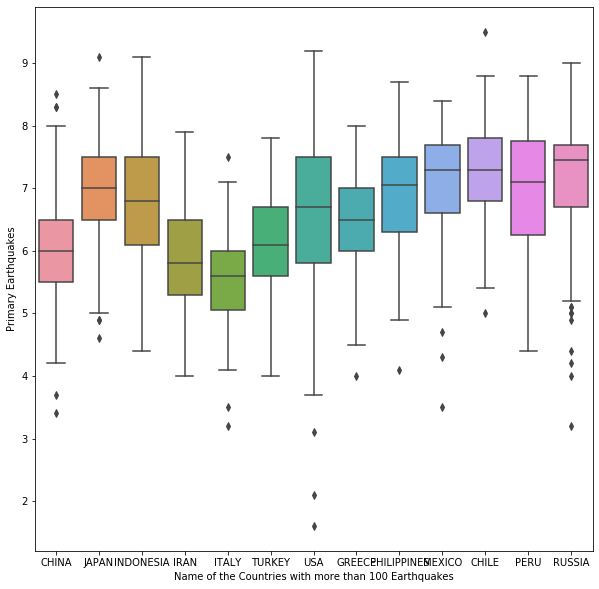

In [148]:
plt.figure(figsize=(10,10))

sns.boxplot(x='country' , y= 'eq_primary', data=subset, order=top_countries.index )

plt.xlabel('Name of the Countries with more than 100 Earthquakes')
plt.ylabel('Primary Earthquakes')
plt.show()


#### Exercise 2.17: Plotting a Stacked Bar Chart



In this exercise, we'll plot a stacked bar chart that represents the number of tsunamis that occurred for each intensity level. 

1. Find the number of data points that fall into each grouped value of intensity and flag_tsunami:

In [160]:
grouped_data = data.groupby(['intensity', 'flag_tsunami']).size()
grouped_data

intensity  flag_tsunami
2.0        0                 5
3.0        0                10
           1                 8
4.0        0                37
           1                19
5.0        0                74
           1                38
6.0        0               151
           1                63
7.0        0               342
           1                91
8.0        0               470
           1               119
9.0        0               356
           1               132
10.0       0               494
           1               130
11.0       0                79
           1                58
12.0       0                68
           1                 4
dtype: int64

In [161]:
grouped_data.to_dict()

{(2.0, 0): 5,
 (3.0, 0): 10,
 (3.0, 1): 8,
 (4.0, 0): 37,
 (4.0, 1): 19,
 (5.0, 0): 74,
 (5.0, 1): 38,
 (6.0, 0): 151,
 (6.0, 1): 63,
 (7.0, 0): 342,
 (7.0, 1): 91,
 (8.0, 0): 470,
 (8.0, 1): 119,
 (9.0, 0): 356,
 (9.0, 1): 132,
 (10.0, 0): 494,
 (10.0, 1): 130,
 (11.0, 0): 79,
 (11.0, 1): 58,
 (12.0, 0): 68,
 (12.0, 1): 4}

2. Use the .unstack() method on the resultant DataFrame to get the level-1 index (flag_tsunami) as a column:

In [158]:
data_to_plot= grouped_data.unstack()
data_to_plot

flag_tsunami,0,1
intensity,,
2.0,5.0,NaN
3.0,10.0,8.0
4.0,37.0,19.0
5.0,74.0,38.0
6.0,151.0,63.0
7.0,342.0,91.0
8.0,470.0,119.0
9.0,356.0,132.0
10.0,494.0,130.0


In [162]:
data_to_plot.to_dict()

{0: {2.0: 5.0,
  3.0: 10.0,
  4.0: 37.0,
  5.0: 74.0,
  6.0: 151.0,
  7.0: 342.0,
  8.0: 470.0,
  9.0: 356.0,
  10.0: 494.0,
  11.0: 79.0,
  12.0: 68.0},
 1: {2.0: nan,
  3.0: 8.0,
  4.0: 19.0,
  5.0: 38.0,
  6.0: 63.0,
  7.0: 91.0,
  8.0: 119.0,
  9.0: 132.0,
  10.0: 130.0,
  11.0: 58.0,
  12.0: 4.0}}

3. Create the stacked bar chart. We first use the sns.set() function to indicate that we want to use seaborn as our visualization library. Then, we can easily use the native .plot() function in pandas to plot a stacked bar chart by passing the kind='bar' and stacked=True arguments:

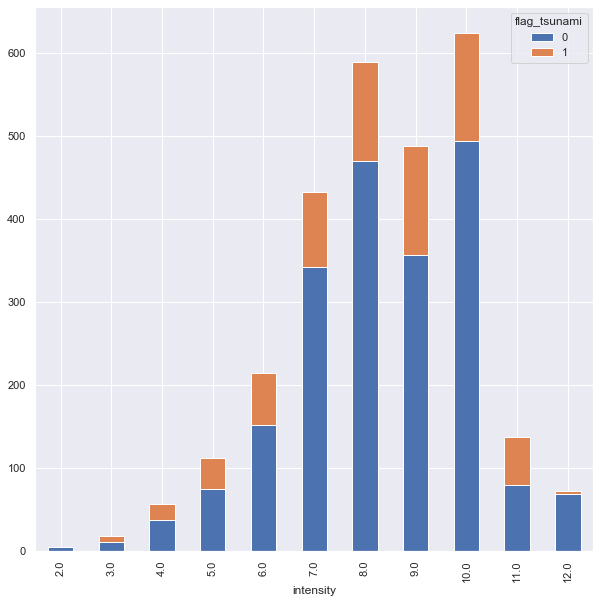

In [163]:
sns.set()

data_to_plot.plot(kind='bar',stacked = True, figsize=(10,10))

plt.show()